In [1]:
%matplotlib inline
import requests
import pandas as pd
import json
import pdb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats

In [2]:
client_id = 'soccer-data.p.rapidapi.com' 
api_key = '50e793e514msh10bde0be822b28ap1e78c7jsnf0954014cacc'

In [3]:
Request_URL = 'https://developers.broadage.com/soccer-api/match-events-basic'
Request_URL_2 = 'https://soccer-data.p.rapidapi.com'

In [4]:
df_1 = pd.read_csv('/Users/flatironschool/Desktop/mod_3_P/kick_locations.csv')
#df_1.head()
#df_1.iloc[0,6:7]=22

In [5]:
#create new df with shot percentage
df_1['out%']=df_1['Out of Box (G)']/df_1['Out of Box (S)']
df_1['pen%']=df_1['Penalty Area (G)']/df_1['Penalty Area (S)']
df_1['six%']=df_1['Six Yard Box (G)']/df_1['Six Yard Box (S)']
df_1['prf%']=df_1['Preferred (G)']/df_1['Preferred (S)']
df_1['wek%']=df_1['Weak (G)']/df_1['Weak (S)']
df_1['hed%']=df_1['Head (G)']/df_1['Head (S)']


In [6]:
df_3=df_1[['Year', 'Player', 'Preferred Foot', 'Out of Box (S)', 'Out of Box (G)',
       'Penalty Area (S)', 'Penalty Area (G)', 'Six Yard Box (S)',
       'Six Yard Box (G)', 'Preferred (S)', 'Preferred (G)', 'Weak (S)',
       'Weak (G)', 'Head (S)', 'Head (G)', 'All (S)', 'All (G)']]

In [7]:
df_2=df_1[['Player','out%','pen%','six%','prf%','wek%','hed%']]

In [8]:
#df_2.reset_index()
df_2.head(3)

,Player,out%,pen%,six%,prf%,wek%,hed%
0,Aguero,0.060606,0.018519,0.285714,0.187500,0.175000,0.294118
1,Kane,0.043478,0.259259,0.500000,0.152778,0.217391,0.083333
2,Diego Costa,0.000000,0.271186,0.571429,0.285714,0.227273,0.250000


In [9]:
df_3.head(3)

,Year,Player,Preferred Foot,Out of Box (S),Out of Box (G),Penalty Area (S),Penalty Area (G),Six Yard Box (S),Six Yard Box (G),Preferred (S),Preferred (G),Weak (S),Weak (G),Head (S),Head (G),All (S),All (G)
0,2014/15,Aguero,R,33,2,108,2,7,2,96,18,40,7,17,5,148,6
1,2014/15,Kane,R,46,2,54,14,10,5,72,11,23,5,12,1,110,21
2,2014/15,Diego Costa,R,10,0,59,16,7,4,42,12,22,5,12,3,76,20


In [10]:
def get_sample_means(n,p,sample_size,iterations):
    sample_means = []
    sample_mean = 0
    for i in range(iterations):
        sample_mean=round(np.random.binomial(n,p,sample_size).mean(),3)
        sample_means.append(sample_mean)
    return sample_means

In [11]:
shot_dict={'out':75/1329,'penalty':662/3206,'six':185/465,'strong':601/3310,'weak':183/1011,'head':132/659,'all':902/5000}

Text(0.5, 1.0, 'out of box shooting efficiency')

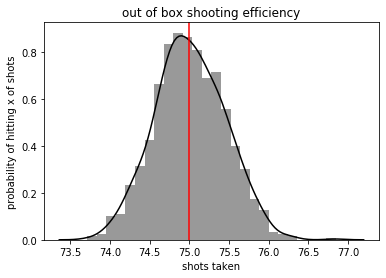

In [30]:
sns.distplot(get_sample_means(1329,(75/1329),350,1000),color='k')
plt.axvline(x=75,color='red')
plt.xlabel('shots taken')
plt.ylabel('probability of hitting x of shots')
plt.title('out of box shooting efficiency')

Text(0.5, 1.0, 'penalty area shooting efficiency')

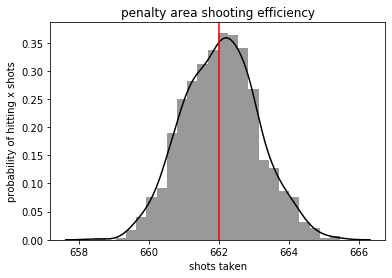

In [29]:
sns.distplot(get_sample_means(3206,(662/3206),500,1000),color='k')
plt.axvline(x=662,color='red')
plt.xlabel('shots taken')
plt.ylabel('probability of hitting x shots')
plt.title('penalty area shooting efficiency')

Text(0.5, 1.0, 'six yard box shooting efficiency')

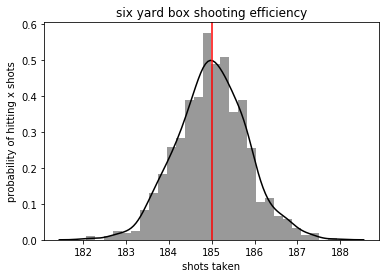

In [27]:
sns.distplot(get_sample_means(465,(185/465),150,1000),color='k')
plt.axvline(x=185,color='red')
plt.xlabel('shots taken')
plt.ylabel('probability of hitting x shots')
plt.title('six yard box shooting efficiency')

Text(0.5, 1.0, 'strong foot shooting efficiency')

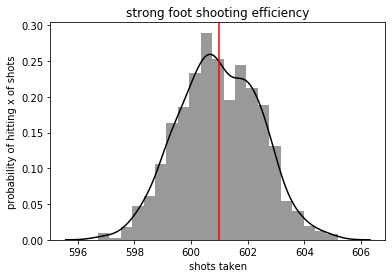

In [26]:
sns.distplot(get_sample_means(3310,(601/3310),250,1000),color='k')
plt.axvline(x=601,color='red')
plt.xlabel('shots taken')
plt.ylabel('probability of hitting x of shots')
plt.title('strong foot shooting efficiency')

Text(0.5, 1.0, 'week foot shooting efficiency')

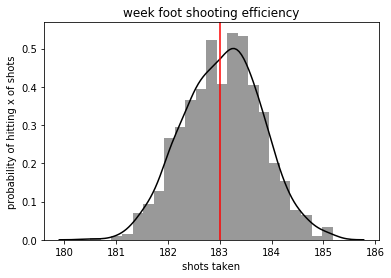

In [31]:
sns.distplot(get_sample_means(1011,(183/1011),250,1000),color='k')
plt.axvline(x=183,color='red')
plt.xlabel('shots taken')
plt.ylabel('probability of hitting x of shots')
plt.title('week foot shooting efficiency')

Text(0.5, 1.0, 'header shooting efficiency')

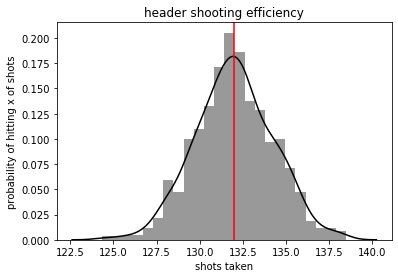

In [32]:
sns.distplot(get_sample_means(659,(132/659),20,1000),color='k')
plt.axvline(x=132,color='red')
plt.xlabel('shots taken')
plt.ylabel('probability of hitting x of shots')
plt.title('header shooting efficiency')